# The Sparks foundation #GRIPJUNE2021

## Prediction using Supervised ML  #Task1

### By: Mohammad Abdul Maajid Bhat

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
df = pd.read_excel (r'C:\Users\Maajid\Downloads\Student_Data.xlsx')
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Checking for Missing Value

In [5]:
df.apply(lambda x: x.isnull().sum())

'''No Missing Value in data set'''

Hours     0
Scores    0
dtype: int64

### Summary of Data

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Exploratory Data Analysis

<AxesSubplot:xlabel='Scores', ylabel='Density'>

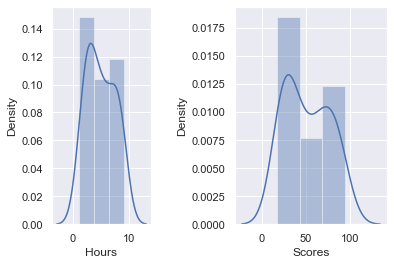

In [77]:
# plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
sns.distplot(df['Hours'])
plt.subplot(1,2,2)
sns.distplot(df['Scores'])

'Thus it indicates there is a positive relationship between No. of Hours and Score'

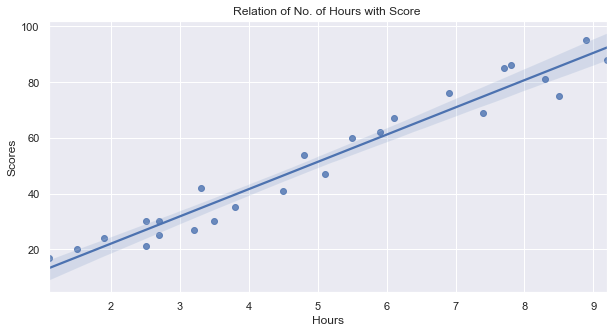

In [18]:
plt.figure(figsize=(10, 5))
sns.set_theme(color_codes=True)
plt.title('Relation of No. of Hours with Score ')
sns.regplot(x="Hours", y="Scores", data=df)

'''Thus it indicates there is a positive relationship between No. of Hours and Score'''

<AxesSubplot:>

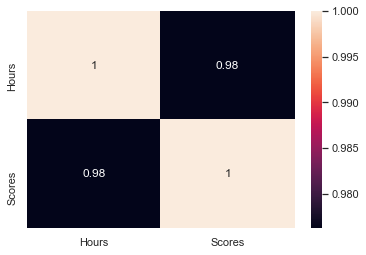

In [19]:
sns.heatmap(df.corr(),annot = True)

'''No. of Hours and Scores are highly correlated with each other '''

In [78]:
# Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Splitting Data Set

In [79]:
X = df.iloc[:, :-1].values    
y = df.iloc[:, 1].values 

In [80]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

### Training our model

In [81]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [82]:
import statsmodels.api as sm

In [83]:
X_endog = sm.add_constant(X_test)

In [84]:
res = sm.OLS(y_test, X_endog)
res.fit()

In [85]:
res.fit().summary()

C:\Users\MAAJID\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     75.41
Date:                Sat, 05 Jun 2021   Prob (F-statistic):            0.00321
Time:                        14:19:23   Log-Likelihood:                -13.891
No. Observations:                   5   AIC:                             31.78
Df Residuals:                       3   BIC:                             31.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2645      4.750      1.108      0.349      -9.852      20.381
x1             8.8623      1.021      8.684      0.003       5.615      12.110
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.464
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.522
Skew:                          -0.640   Prob(JB):                        0.770
Kurtosis:                       2.068   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation of above result
1. In the above result, R^2 = 0.96 which tells us that 96% of variation in y variable(Marks) is explained by X1(Hours of studying), thus our model is a goodfit model'''
2. Taking Confidence Level at At 95%, Prob (F-statistic) < 0.05, Therefore our independent variable is significant in predicting Marks Scored.
3. Also Durbin-Watson score = 1.464, which means there is little presence of +ve Autocorrelation.

In [ ]:
y_pred = regressor.predict(X_test)

In [72]:
y_prediction = pd.DataFrame(y_pred)
y_prediction

,0
0,16.884145
1,33.732261
2,75.357018
3,26.794801
4,60.491033


### Mean Absolute Error, Mean Square Error, Root Mean Square Error 

The value of these errors help us to evaluate performance of our model

In [73]:
from sklearn import metrics

In [86]:
print('MAE :', metrics.mean_absolute_error(y_test, y_prediction))
print('MSE :', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

MAE : 4.183859899002975
MSE : 21.5987693072174
RMSE : 4.6474476121003665


### When students studies for 9.25 hrs, What will be the score in exam?

In [76]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538
